# Modelowanie ARIMA - case study

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.graphics.api import qqplot
%matplotlib inline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from statsmodels.tsa.stattools import adfuller
def check_time_series_stationary(y, rolling_len = 12):
    
    y = pd.Series(y)
    
    df_test = adfuller(y)
    
    if df_test[1] < 0.05:
        print('Szereg jest stacjonarny')
    else:
        print('Szereg jest niestacjonarny')
    
    print("{0:^32s}".format("Dickey-Fuller Test"))
    print("-"*32+"\n")
    
    print("{0:<20s}: {1:>10.4f}".format('Test Statistic', df_test[0]))
    print("{0:<20s}: {1:>10.4f}".format('p-value', df_test[1]))
    print("-"*32+"\n")
    
    rolling_mean = y.rolling(rolling_len).mean()
    rolling_var = y.rolling(rolling_len).var()

    plt.plot(y)
    plt.plot(rolling_mean, label="Rolling mean")
    plt.plot(rolling_var, label="Rolling var")
    plt.legend()
    plt.show()
    
    print("{0:^32s}".format("Autocorrelation plot"))
    print("-"*32+"\n")
    pd.plotting.autocorrelation_plot(y)
    plt.show()

# Zadanie - case study

Dokonaj analizy szeregu czasowego `AirPassengers`. 

a) Przekształć szereg do postaci stacjonarnej.

b) Dopasuj odpowiedni model za pomocą kroswalidacji dla szeregów czasowych.

c) Dokonaj predykcji na zbiorze testowym przy użyciu modelu zbudowanego na zbiorze treningowym.

Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :     0.8154
p-value             :     0.9919
--------------------------------



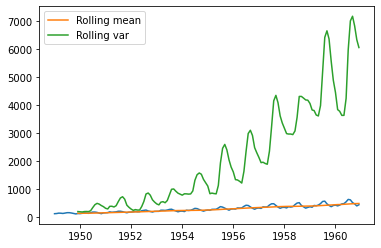

      Autocorrelation plot      
--------------------------------



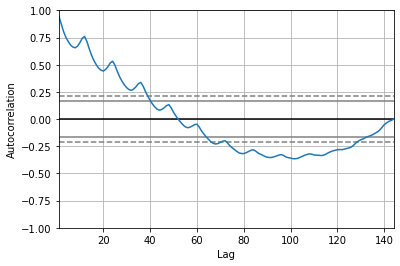

In [ ]:
air_passengers = pd.read_csv('AirPassengers.csv', 
                 parse_dates=['Month'], index_col='Month')

check_time_series_stationary(air_passengers['#Passengers'])
#brak stacjonarności, najpierw poradzimy sobie z nierówną wariancją

In [ ]:
#podzielmy zatem dane wejściowe na zbiór treningowy i testowy i dopasujmy model SARIMA
k = int(air_passengers.size * 0.8)

air_passengers_train = air_passengers[:k]
air_passengers_test = air_passengers[k:]

m2 = SARIMAX(endog=air_passengers_train, order=(1, 1, 0),seasonal_order = (0,1,0,12), trend='c').fit()
air_passengers_test

,#Passengers
Month,
1958-08-01,505
1958-09-01,404
1958-10-01,359
1958-11-01,310
1958-12-01,337
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396


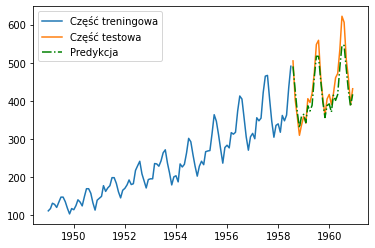

In [ ]:
m2_pred = m2.predict(start='1958-08-01', end='1960-12-01', dynamic=True) #bardzo ładna predykcja robiona tylko samym modelem bez danych historycznych

plt.plot(air_passengers_train, label="Część treningowa")
plt.plot(air_passengers_test, label="Część testowa")
plt.plot(m2_pred, 'g-.', label="Predykcja")
plt.legend()
plt.show()